In [62]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error


#### CARGAMOS EL ARCHIVO INSTALLS CON FEATURES SACADOS DEL ARCHIVO INSTALLS

In [107]:
installs = pd.read_csv('data/installsConFeatures.csv', low_memory=False, parse_dates = ['created'], index_col=['created'])
installs = installs.sort_index()
installs.head()

,Unnamed: 0,application_id,ref_type,ref_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,...,top10apps,top50marcas,top10marcas,top10marcasSinNan,agentes,top50agentes,top10agentes,kindReducido,top10tipo,top10leng
created,,,,,,,,,,,,,,,,,,,,,
2019-04-18 00:00:01.560,94738,70,1,4432995619177048534,False,False,6287817205707153877,0,208,1095,...,0,0,0,0,0,0,0,1,1,9
2019-04-18 00:00:01.851,94737,70,1,5904733559638204455,False,False,6287817205707153877,0,208,1095,...,0,0,0,0,0,0,0,1,1,9
2019-04-18 00:00:05.152,111877,65,1,896373747754111825,False,True,6287817205707153877,6,102,2,...,3,6,6,6,2,2,1,0,0,8
2019-04-18 00:00:05.589,76146,27,0,3399210824535017892,False,False,6287817205707153877,0,190,2,...,0,0,0,0,21,14,6,1,1,2
2019-04-18 00:00:06.795,435184,339,0,1541425881979513687,False,False,6287817205707153877,0,190,2,...,0,0,0,0,68,46,10,1,1,6


### Dropeamos columnas que quedaron mal

In [108]:
installs.drop(['Unnamed: 0'],axis = 1,inplace=True)

#### Luego cargamos la primer ventana y sus lebels correspondientes a la segunda (Asi con todas las demas)

In [109]:
info1 = installs['2019-04-21':'2019-04-23'].reset_index().groupby('ref_hash').agg({'created' : 'min'})
info1['created'] = info1['created'] - pd.Timestamp('2019-04-21 00:00:00')
info1['created'] = info1['created'].transform(lambda x: x.total_seconds())
info1 = info1.reset_index()
info1 = info1.merge(installs['2019-04-18':'2019-04-20'].reset_index(),on="ref_hash", how="right")
info1 = info1.rename(columns={'created_x':'label','created_y':'created'})

label1 = info1['label'].to_frame()
train1 = info1.drop('label', axis=1)

In [110]:
info2 = installs['2019-04-22':'2019-04-24'].reset_index().groupby('ref_hash').agg({'created' : 'min'})
info2['created'] = info2['created'] - pd.Timestamp('2019-04-22 00:00:00')
info2['created'] = info2['created'].transform(lambda x: x.total_seconds())
info2 = info2.reset_index()
info2 = info2.merge(installs['2019-04-19':'2019-04-21'].reset_index(),on="ref_hash", how="right")
info2 = info2.rename(columns={'created_x':'label','created_y':'created'})

label2 = info2['label'].to_frame()
train2 = info2.drop('label', axis=1)

In [111]:
info3 = installs['2019-04-23':'2019-04-25'].reset_index().groupby('ref_hash').agg({'created' : 'min'})
info3['created'] = info3['created'] - pd.Timestamp('2019-04-23 00:00:00')
info3['created'] = info3['created'].transform(lambda x: x.total_seconds())
info3 = info3.reset_index()
info3 = info3.merge(installs['2019-04-20':'2019-04-22'].reset_index(),on="ref_hash", how="right")
info3 = info3.rename(columns={'created_x':'label','created_y':'created'})

label3 = info3['label'].to_frame()
train3 = info3.drop('label', axis=1)

In [112]:
info4 = installs['2019-04-24':'2019-04-26'].reset_index().groupby('ref_hash').agg({'created' : 'min'})
info4['created'] = info4['created'] - pd.Timestamp('2019-04-24 00:00:00')
info4['created'] = info4['created'].transform(lambda x: x.total_seconds())
info4 = info4.reset_index()
info4 = info4.merge(installs['2019-04-21':'2019-04-23'].reset_index(),on="ref_hash", how="right")
info4 = info4.rename(columns={'created_x':'label','created_y':'created'})

label4 = info4['label'].to_frame()
train4 = info4.drop('label', axis=1)

In [113]:
ventana_ultima = installs['2019-04-24':'2019-04-26'].reset_index()

In [114]:
ventana_ultima

,created,application_id,ref_type,ref_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,...,top10apps,top50marcas,top10marcas,top10marcasSinNan,agentes,top50agentes,top10agentes,kindReducido,top10tipo,top10leng
0,2019-04-24 00:00:00.178,21,1,2105892908739159676,False,False,6287817205707153877,0,74,0,...,5,0,0,0,0,0,0,1,1,0
1,2019-04-24 00:00:02.223,226,1,208059911196607757,False,True,6287817205707153877,6,163,2,...,10,6,6,6,2,2,1,84,10,8
2,2019-04-24 00:00:02.352,70,1,9071467689792743380,False,False,6287817205707153877,0,208,1095,...,0,0,0,0,0,0,0,1,1,9
3,2019-04-24 00:00:02.353,70,1,9071467689792743380,False,True,6287817205707153877,0,208,1095,...,0,0,0,0,0,0,0,28,6,9
4,2019-04-24 00:00:02.764,70,1,7588153492836870321,False,False,6287817205707153877,0,208,1095,...,0,0,0,0,0,0,0,1,1,9
5,2019-04-24 00:00:04.010,36,1,8124402120818138602,False,False,6287817205707153877,1,227,2,...,2,1,1,1,2,2,1,1,1,8
6,2019-04-24 00:00:05.468,77,1,3632067678141958815,False,False,6287817205707153877,0,94,0,...,0,0,0,0,0,0,0,1,1,0
7,2019-04-24 00:00:06.381,31,1,4738903240456897851,False,False,6287817205707153877,0,101,0,...,0,0,0,0,0,0,0,1,1,0
8,2019-04-24 00:00:08.243,185,0,2015083770181669009,False,True,6287817205707153877,0,190,2,...,0,0,0,0,35,24,0,0,0,3
9,2019-04-24 00:00:09.630,226,1,5460606787430788722,False,True,6287817205707153877,6,326,2,...,10,6,6,6,2,2,1,0,0,8


#### Como al algoritmo que aplicaremos despues no le gustan los NAN, a esos nan le ponemos 3 dias ( en segundos )

In [122]:
train1 = train1.dropna()
train2 = train2.dropna()
train3 = train3.dropna()
train4 = train4.dropna()
ventana_ultima = ventana_ultima.dropna()
label1 = label1.fillna(3*24*60*60)
label2 = label2.fillna(3*24*60*60)
label3 = label3.fillna(3*24*60*60)
label4 = label4.fillna(3*24*60*60)


#### Ahora sacaremos mas labels para cada ventana en particular...

In [116]:
train1['tiempoDesdeComienzoDeVentana'] = (installs.reset_index()['created'] - pd.Timestamp('2019-04-18 00:00:00')).transform(lambda x: x.total_seconds())
train2['tiempoDesdeComienzoDeVentana'] = (installs.reset_index()['created'] - pd.Timestamp('2019-04-19 00:00:00')).transform(lambda x: x.total_seconds())
train3['tiempoDesdeComienzoDeVentana'] = (installs.reset_index()['created'] - pd.Timestamp('2019-04-20 00:00:00')).transform(lambda x: x.total_seconds())
train4['tiempoDesdeComienzoDeVentana'] = (installs.reset_index()['created'] - pd.Timestamp('2019-04-21 00:00:00')).transform(lambda x: x.total_seconds())
ventana_ultima['tiempoDesdeComienzoDeVentana'] = (installs.reset_index()['created'] - pd.Timestamp('2019-04-24 00:00:00')).transform(lambda x: x.total_seconds())


In [117]:
train1['accionesDesdeQueComenzoLaVentana'] = np.arange(len(train1))
train2['accionesDesdeQueComenzoLaVentana'] = np.arange(len(train2))
train3['accionesDesdeQueComenzoLaVentana'] = np.arange(len(train3))
train4['accionesDesdeQueComenzoLaVentana'] = np.arange(len(train4))
ventana_ultima['accionesDesdeQueComenzoLaVentana'] = np.arange(len(ventana_ultima))

In [118]:
train1.drop(['created'],axis =1, inplace = True )
train2.drop(['created'],axis =1, inplace = True )
train3.drop(['created'],axis =1, inplace = True )
train4.drop(['created'],axis =1, inplace = True )
ventana_ultima.drop(['created'],axis =1, inplace = True )


In [144]:
#### XGBOOST LE GUSTAN LAS COLUMNAS ORDENADAS... 
ventana_ultima=ventana_ultima.sort_index(axis=1, ascending=False)
train1=train1.sort_index(axis=1, ascending=False)
train2=train2.sort_index(axis=1, ascending=False)
train3=train3.sort_index(axis=1, ascending=False)
train4=train4.sort_index(axis=1, ascending=False)



In [145]:

train1.head()

,wifi,user_agent,top50marcas,top50agentes,top10tipo,top10marcasSinNan,top10marcas,top10leng,top10apps,top10agentes,...,dia,device_model,device_language,device_countrycode,device_brand,attributed,application_id,agentes,accionesDesdeQueComenzoLaVentana,TopApp/Otro
160860,False,0,0,0,1,0,0,0,0,0,...,20,1079,0,6287817205707153877,0,False,31,0,160860,0
160859,True,3278,0,14,1,0,0,3,0,6,...,20,190,3,6287817205707153877,0,False,27,21,160859,0
160858,False,0,0,0,1,0,0,0,5,0,...,20,1545,0,6287817205707153877,0,False,21,0,160858,0
160857,False,0,0,0,1,0,0,0,5,0,...,20,367,0,6287817205707153877,0,False,21,0,160857,0
160856,True,120,5,2,1,5,5,8,2,1,...,20,62,34,6287817205707153877,5,False,36,2,160856,2


#### Ahora comenzaremos a entrenar con XGBOOST

In [146]:
train1.shape,label1.shape

((160861, 31), (160861, 1))

In [147]:
data_dmatrix = xgb.DMatrix(data=train1,label=label1)


In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(train1, label1, test_size=0.2, random_state=123)

In [149]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', 
                colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [150]:
xg_reg.fit(X_train,y_train)


[15:49:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=10,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [151]:
preds = xg_reg.predict(X_test)


In [152]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 90989.247660


In [153]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,
          'learning_rate': 0.1, 'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10,
                    metrics="rmse", as_pandas=True, seed=123)

[15:50:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:50:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:50:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [83]:
cv_results.head()


,test-rmse-mean,test-rmse-std,train-rmse-mean,train-rmse-std
0,230783.828125,31.646742,230746.484375,16.341903
1,207941.760417,159.380333,207935.291667,160.948524
2,187375.572917,88.439841,187440.369792,65.174052
3,168978.958333,95.380471,168999.760417,87.610804
4,152367.692708,20.185381,152368.385417,9.316365


In [154]:
print((cv_results["test-rmse-mean"]).tail(1))


49    13617.624023
Name: test-rmse-mean, dtype: float64


In [85]:
xg_reg_ = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)


[15:23:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


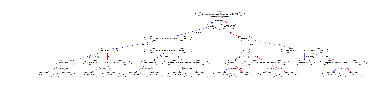

In [86]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [10000, 10000]
plt.show()

#### Ahora con el modelo que entrenamos vamos a entrenar las ultima ventana. Y los datos que nos faltan los sacamos de la anteultima ventana.

In [155]:
X_train.shape,ventana_ultima.shape

((128688, 31), (160033, 31))

In [156]:
preds = xg_reg.predict(ventana_ultima)


In [157]:
ventana_ultima['predicciones']=preds

In [158]:
preds = xg_reg.predict(train4)


In [159]:
train4['predicciones']=preds

#### Ahora que tenemos las predicciones para la ventana 4. Lo que vamos hacer es fijarnos para cuantos refhash del targen coinciden... deberian ser aprox 1500

In [218]:
target = pd.read_csv('data/final.csv', low_memory=False, names=['ref_hash'])


In [203]:
target.sort_values(by='ref_hash').head()

,ref_hash
24,1037575899869926
1837,4700892528469466
1942,4920567832392301
3736,8624897563799496
76,11222455493472018


In [219]:
mergeados = ventana_ultima.merge(target, left_on = 'ref_hash',right_on='ref_hash', how='inner')

In [220]:
len(mergeados) #Es un buen numero.

1970

In [221]:
### Ahora vamos a quedarnos con todos los que estan en target. Ya que eso es lo que nos interesa
mergeados = ventana_ultima.merge(target, left_on = 'ref_hash',right_on='ref_hash', how='right')

In [222]:
len(mergeados)

4420

In [223]:
mergeados.head()

,wifi,user_agent,top50marcas,top50agentes,top10tipo,top10marcasSinNan,top10marcas,top10leng,top10apps,top10agentes,...,device_model,device_language,device_countrycode,device_brand,attributed,application_id,agentes,accionesDesdeQueComenzoLaVentana,TopApp/Otro,predicciones
0,False,7482.0,0.0,5.0,0.0,0.0,0.0,0.0,9.0,2.0,...,133.0,0.0,6.287817e+18,0.0,False,210.0,7.0,160025.0,5.0,158169.484375
1,True,1045.0,6.0,2.0,1.0,6.0,6.0,7.0,6.0,1.0,...,428.0,33.0,6.287817e+18,6.0,False,121.0,2.0,160023.0,4.0,156509.984375
2,True,1850.0,1.0,2.0,0.0,1.0,1.0,8.0,6.0,1.0,...,17.0,34.0,6.287817e+18,1.0,False,121.0,2.0,160004.0,4.0,158169.484375
3,True,2441.0,0.0,9.0,1.0,0.0,0.0,3.0,4.0,5.0,...,190.0,3.0,6.287817e+18,0.0,False,68.0,13.0,159967.0,0.0,157763.812500
4,True,2441.0,0.0,9.0,0.0,0.0,0.0,3.0,4.0,5.0,...,190.0,3.0,6.287817e+18,0.0,False,68.0,13.0,159895.0,0.0,157763.812500


In [224]:
mergeados=mergeados.fillna(60*60*24*3)

In [225]:
mergeados=mergeados.groupby('ref_hash').agg({'predicciones':'mean'}).rename(columns={'predicciones':'obj'})

In [226]:
mergeados.head()

,obj
ref_hash,
1037575899869926,168778.078125
4700892528469466,259200.000000
4920567832392301,259200.000000
8624897563799496,157763.812500
11222455493472018,259200.000000


In [227]:
mergeados= mergeados.reset_index().sort_values(by='ref_hash', ascending=True)

In [228]:
mergeados.head()

,ref_hash,obj
0,1037575899869926,168778.078125
1,4700892528469466,259200.000000
2,4920567832392301,259200.000000
3,8624897563799496,157763.812500
4,11222455493472018,259200.000000


In [229]:
mergeados.to_csv('data/preds_gxboost_installs_4ventana.csv')

In [230]:
### Ahora para la tercer ventana.
mergeados2 = train4.merge(target, left_on = 'ref_hash',right_on='ref_hash', how='inner')

In [231]:
len(mergeados2)

1780

In [232]:
mergeados2 = train4.merge(target, left_on = 'ref_hash',right_on='ref_hash', how='right')

In [233]:
mergeados2=mergeados2.fillna(60*60*24*3)

In [234]:
mergeados2=mergeados2.groupby('ref_hash').agg({'predicciones':'mean'}).rename(columns={'predicciones':'obj'})

In [235]:
mergeados2.head()

,obj
ref_hash,
1037575899869926,259200.000000
4700892528469466,259200.000000
4920567832392301,168778.078125
8624897563799496,259200.000000
11222455493472018,168778.078125


In [236]:
mergeados2=mergeados2.reset_index().sort_values(by='ref_hash', ascending=True)
mergeados2.head()

,ref_hash,obj
0,1037575899869926,259200.000000
1,4700892528469466,259200.000000
2,4920567832392301,168778.078125
3,8624897563799496,259200.000000
4,11222455493472018,168778.078125


In [237]:
mergeados2.reset_index().to_csv('data/preds_gxboost_installs_3ventana.csv')